**Set up some prerequisites**

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

**Build the Quantum Circuit**

In [2]:
# initialize the circuit
number_of_qubits = 3
circuit = QuantumCircuit(number_of_qubits) # call the circuit object paramterized by the number of qubits
circui.draw() # print the circuit to see where you are at

     
q_0: 
     
q_1: 
     
q_2: 
     


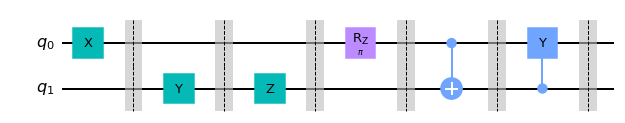

In [3]:
# add some quantum gates
number_of_qubits = 2
circuit = QuantumCircuit(number_of_qubits)
circuit.x(0)
circuit.barrier()
circuit.y(1)
circuit.barrier()
circuit.z(1)
circuit.barrier()
circuit.rz(3.1415926, 0)
circuit.barrier()
circuit.cx(0, 1) # CNOT, aka control-x
circuit.barrier()
circuit.cy(1, 0)
circuit.barrier()

circuit.draw()


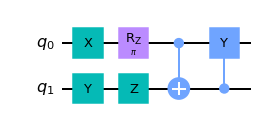

In [4]:
# gates can be parallelized (explain the math in pad)
number_of_qubits = 2
circuit = QuantumCircuit(number_of_qubits)
circuit.x(0) # method/function parameter specify the qubit to operate on
circuit.y(1)
circuit.z(1)
circuit.rz(3.1415926, 0) # rz gate parameterized by the rotation angle and the qubit of operation
circuit.cx(0, 1) # CNOT, aka control-x
circuit.cy(1, 0)
circuit.draw()

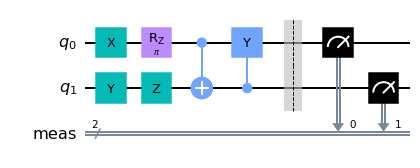

In [6]:
# lastly, do the measurements
number_of_qubits = 2
circuit = QuantumCircuit(number_of_qubits)
circuit.x(0)
circuit.y(1)
circuit.z(1)
circuit.rz(3.1415926, 0)
circuit.cx(0, 1) # CNOT, aka control-x
circuit.cy(1, 0)
circuit.measure_all() # measurement results are recorded on the classical bits
circuit.draw()


Now let's create and measure the bell state: $|\psi\rangle = \left(|00\rangle+|11\rangle\right)/\sqrt{2}.$


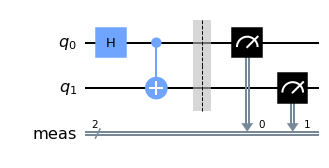

In [8]:
bell_state_circ = QuantumCircuit(2)
bell_state_circ.h(0)
bell_state_circ.cx(0, 1)
bell_state_circ.measure_all()
bell_state_circ.draw()

**Now, let's execute the circuit we just built on the quantum machine!**

First, we will run it on the quantum computer simulator (aka a simulator that mimics "perfect" quantum computer:

1) All the quantum gates + measurements have no errors

2) No restriction on the multi-qubit connectivity, meaning you can do multiqubit gate between any of the qubits

In [9]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(bell_state_circ, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(bell_state_circ)
print(counts)

{'11': 485, '00': 515}


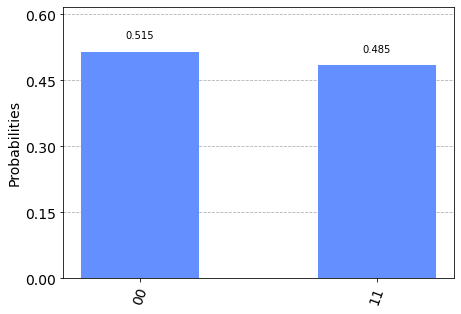

In [10]:
# visualize in a histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)

**What if we run with very few shots?**

{'00': 3, '11': 7}


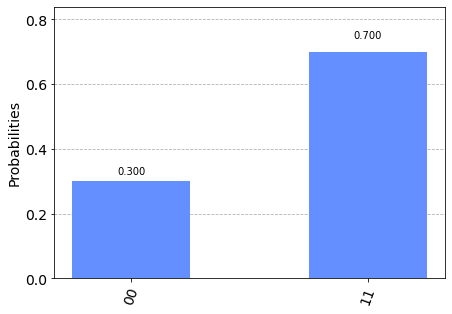

In [12]:
job_sim = execute(bell_state_circ, backend_sim, shots=10)

result_sim = job_sim.result()
counts = result_sim.get_counts(bell_state_circ)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

**Now let's consider the case of running quantum circuits on real physical device**

**Case A: we have imperfect execution of quantum gates and measurement errors**

In [30]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.test.mock import FakeVigo, FakeYorktown
backend = FakeVigo()

(Execute quantum circuits on real machines typically take some waiting time, but you are welcomed try it after the session.)

Here we have a "Fake backend", meaning we are using a simulated backend that trying to mimic the behavior of a real physical backend. The good thing is that we can get immediate results.

In [17]:
# see backend info
backend

<FakeVigo('fake_vigo') from None()>

{'11': 3651, '01': 458, '10': 353, '00': 3538}


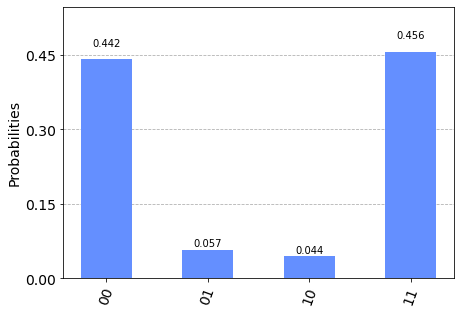

In [18]:
# Now set the backend to a simulator that mimic the physical behavior of a real device

job_sim = execute(bell_state_circ, backend, shots=8000)

result_sim = job_sim.result()
counts = result_sim.get_counts(bell_state_circ)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

**Case B: Restriction on Multi-qubit Gate Connectivity**

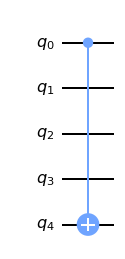

In [19]:
circ = QuantumCircuit(5)
circ.cx(0, 4)
circ.draw()

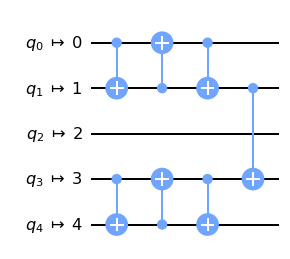

In [20]:
transpiled_circ = transpile(circ, backend=backend, optimization_level=0)
transpiled_circ.draw()
# need swap gates

**Case X: Some gates are not native to the superconducting circuit (aka circuit QED) system**

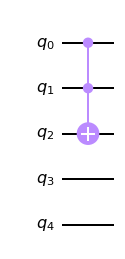

In [21]:
# For instance, on the real machine you would need to decompose the Toffoli gate
circ = QuantumCircuit(5)
circ.ccx(0, 1, 2)
circ.draw()

In [37]:
# we need another backend that has a full-connectivity between qubit 0, 1, and 2
backend = FakeYorktown()

In [38]:
backend

<FakeYorktown('fake_yorktown') from None()>

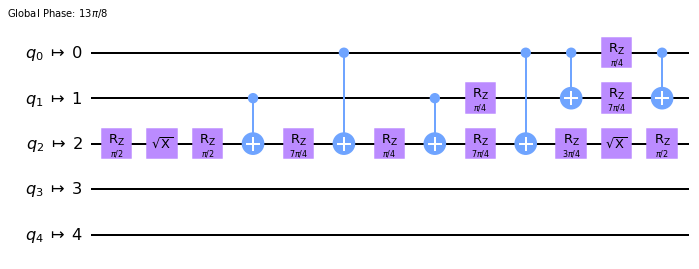

In [44]:
transpiled_circ = transpile(circ, backend=backend, optimization_level=1)
transpiled_circ.draw()
# need 6 CNOT gates

<div>
<img src="Toffoli.png" width="700"/>
</div>

**Note: Toffoli gates are native gates in ion trap/neutral atom quantum machines!**